In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
sns.set_style('dark', {'axes.grid':True, 'axes.edgecolor':'black', 'font.family':['serif'],'font.serif':['Roman'],
                       'xticks.bottom':True, 'ytick.left':True})

In [3]:
cwd = os.getcwd()
filename = cwd + '/winequality-red.csv'
data = pd.read_csv(filename)

In [4]:
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
# check if we have null values
print('Null values: ')
data.isnull().values.any()

Null values: 


False

These are the observed values for quality:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


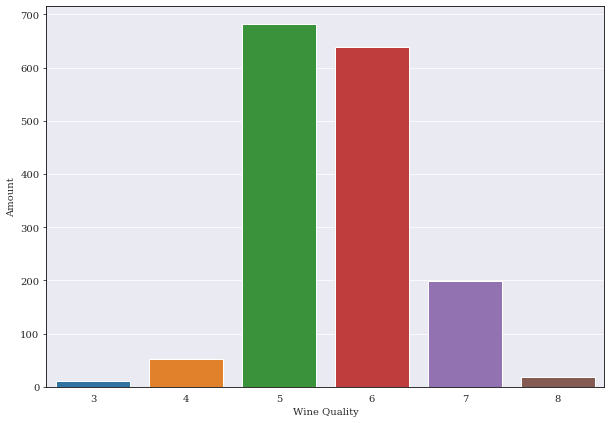

In [6]:
#target_variable
values_counts=data['quality'].value_counts()
print("These are the observed values for " + 'quality' + ":")
print(values_counts)
fig = plt.figure(figsize = (10,7))
sns.countplot(x = 'quality', data = data)
plt.xlabel('Wine Quality')
plt.ylabel('Amount')
plt.show()

In [8]:
# describe features
data.loc[:, data.columns != 'quality'].describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900


(12, 0)

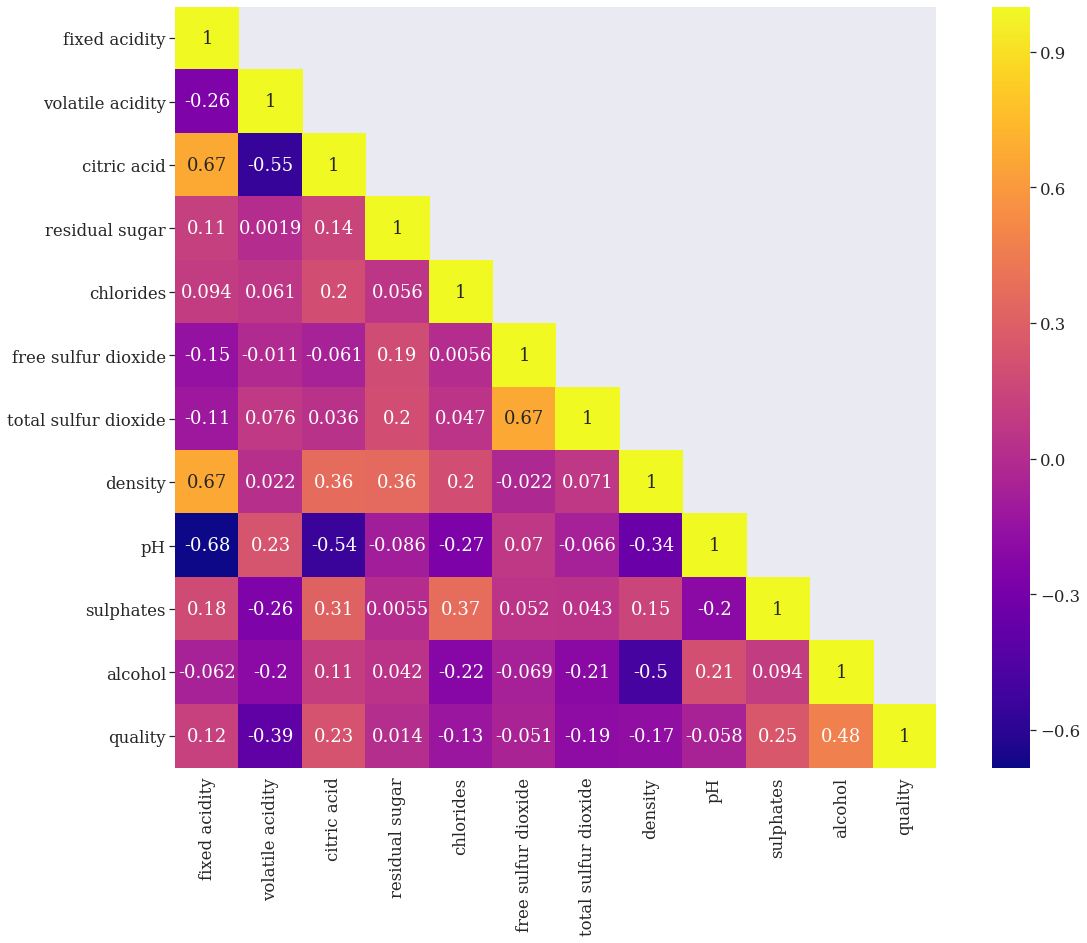

In [68]:
#corelation matrix.
cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax =plt.subplots(figsize = (20,14))
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True, cmap = 'plasma')
ax.set_ylim(12,0)


(12, 0)

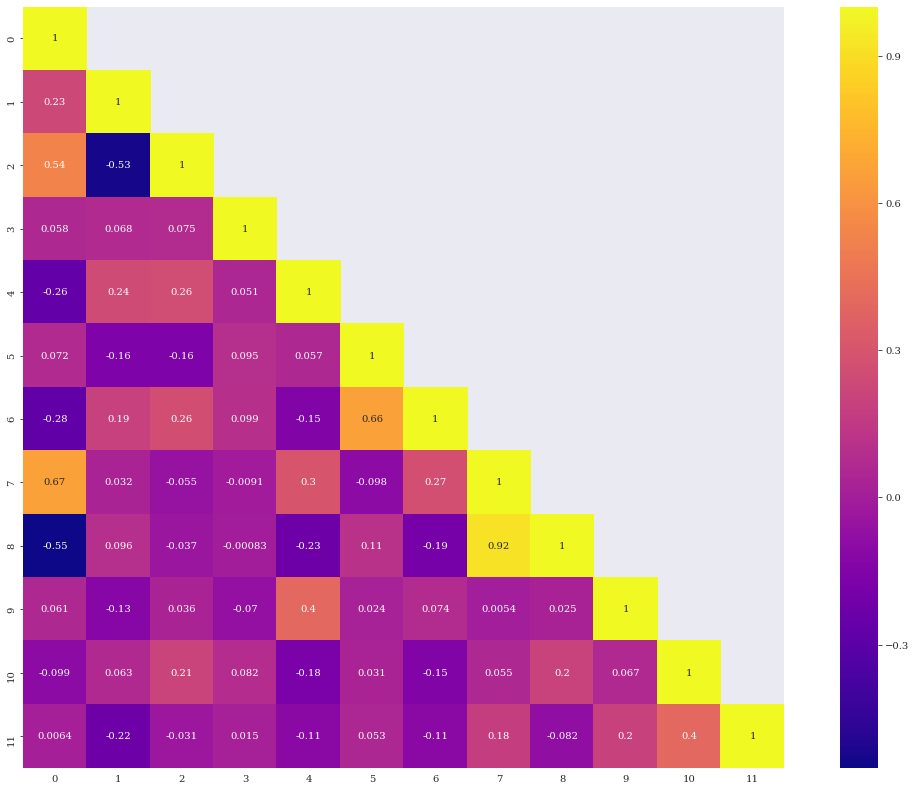

In [7]:
#partial correlation matrix

from scipy import stats, linalg

def partial_corr(C):
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)

            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr

    return P_corr


# Calculate the partial correlation coefficients
part=partial_corr(data)
mask = np.array(part)
mask[np.tril_indices_from(mask)] = False
fig, ax =plt.subplots(figsize = (20,14))
sns.heatmap(data=part,mask=mask,square=True,annot=True,cbar=True, cmap = 'plasma')
ax.set_ylim(12,0)


In [8]:
selected_features=['volatile acidity',
       'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol','quality']
dataset_selected_features=data[selected_features]

In [9]:
condition1=(dataset_selected_features['quality']==3)|(dataset_selected_features['quality']==4)
condition2=(dataset_selected_features['quality']==5)|(dataset_selected_features['quality']==6)
condition3=(dataset_selected_features['quality']==7)|(dataset_selected_features['quality']==8)
level_34=round(dataset_selected_features[condition1].describe(),2)
level_56=round(dataset_selected_features[condition2].describe(),2)
level_78=round(dataset_selected_features[condition3].describe(),2)
level_all=pd.concat([level_34,level_56, level_78],
                    axis=1, 
                    keys=['Levels:3,4','Levels:5,6','Levels:7,8',])
level_all.transpose()

count   mean    std   min    25%    50%  \
Levels:3,4 volatile acidity        63.0   0.72   0.25  0.23   0.56   0.68   
           chlorides               63.0   0.10   0.08  0.04   0.07   0.08   
           total sulfur dioxide    63.0  34.44  26.40  7.00  13.50  26.00   
           density                 63.0   1.00   0.00  0.99   1.00   1.00   
           sulphates               63.0   0.59   0.22  0.33   0.50   0.56   
           alcohol                 63.0  10.22   0.92  8.40   9.60  10.00   
           quality                 63.0   3.84   0.37  3.00   4.00   4.00   
Levels:5,6 volatile acidity      1319.0   0.54   0.17  0.16   0.41   0.54   
           chlorides             1319.0   0.09   0.05  0.03   0.07   0.08   
           total sulfur dioxide  1319.0  48.95  32.71  6.00  24.00  40.00   
           density               1319.0   1.00   0.00  0.99   1.00   1.00   
           sulphates             1319.0   0.65   0.17  0.37   0.54   0.61   
           alcohol               1319.0  10.25   0.97  8.40   9.50  10.00   
           quality               1319.0   5.48   0.50  5.00   5.00   5.00   
Levels:7,8 volatile acidity       217.0   0.41   0.14  0.12   0.30   0.37   
           chlorides              217.0   0.08   0.03  0.01   0.06   0.07   
           total sulfur dioxide   217.0  34.89  32.57  7.00  17.00  27.00   
           density                217.0   1.00   0.00  0.99   0.99   1.00   
           sulphates              217.0   0.74   0.13  0.39   0.65   0.74   
           alcohol                217.0  11.52   1.00  9.20  10.80  11.60   
           quality                217.0   7.08   0.28  7.00   7.00   7.00   

                                   75%     max  
Levels:3,4 volatile acidity       0.88    1.58  
           chlorides              0.09    0.61  
           total sulfur dioxide  48.00  119.00  
           density                1.00    1.00  
           sulphates              0.60    2.00  
           alcohol               11.00   13.10  
           quality                4.00    4.00  
Levels:5,6 volatile acidity       0.64    1.33  
           chlorides              0.09    0.61  
           total sulfur dioxide  65.00  165.00  
           density                1.00    1.00  
           sulphates              0.70    1.98  
           alcohol               10.90   14.90  
           quality                6.00    6.00  
Levels:7,8 volatile acidity       0.49    0.92  
           chlorides              0.08    0.36  
           total sulfur dioxide  43.00  289.00  
           density                1.00    1.00  
           sulphates              0.82    1.36  
           alcohol               12.20   14.00  
           quality                7.00    8.00

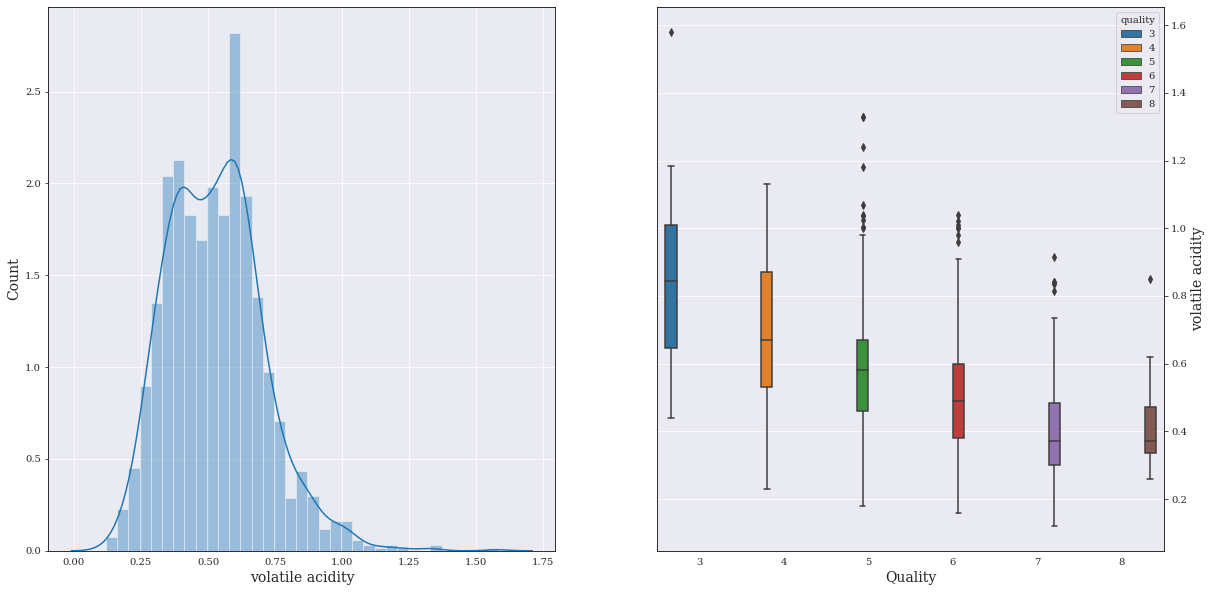

In [12]:
#Volatile acidity
f, axes = plt.subplots(1,2,figsize=(20,10))

sns.distplot(data['volatile acidity'], ax = axes[0])
axes[0].set_xlabel('volatile acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'quality', y = 'volatile acidity', data = data, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('volatile acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

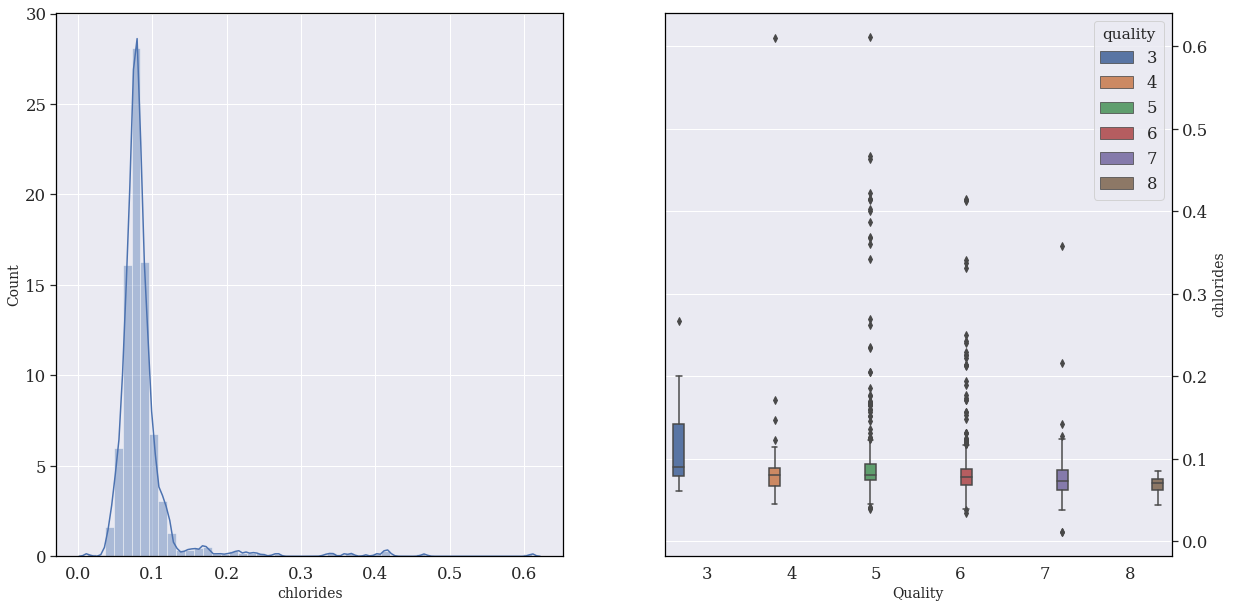

In [74]:
#Chlorides
f, axes = plt.subplots(1,2,figsize=(20,10))

sns.distplot(data['chlorides'], ax = axes[0])
axes[0].set_xlabel('chlorides', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'quality', y = 'chlorides', data = data, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('chlorides', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

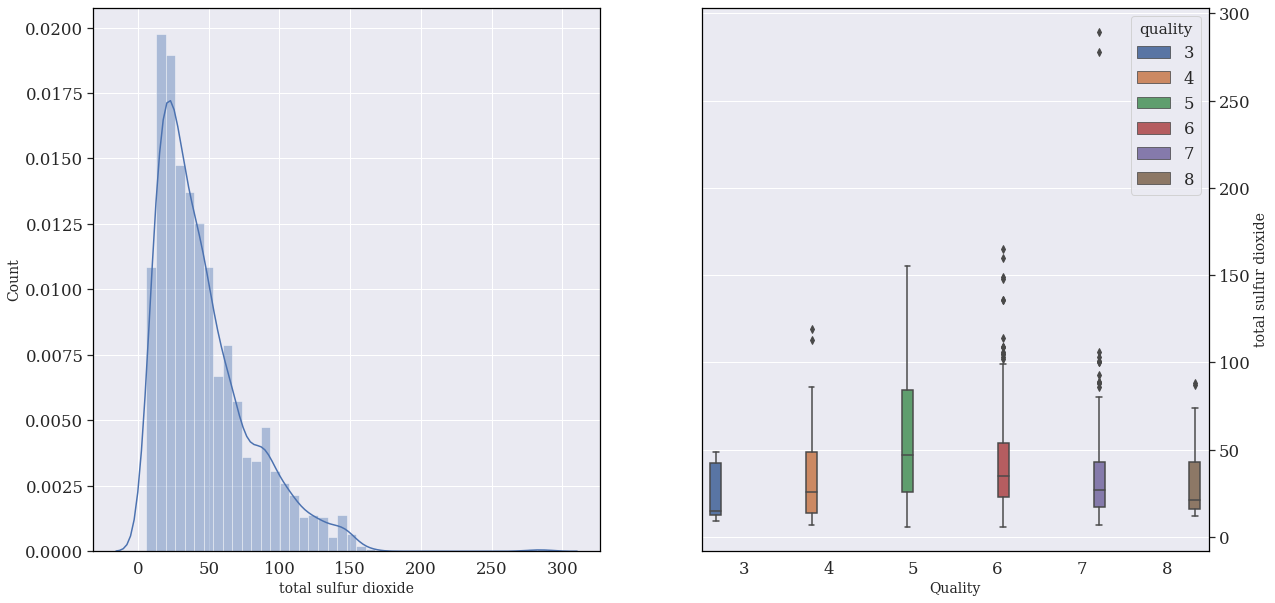

In [75]:
#Total sulfur dioxide
f, axes = plt.subplots(1,2,figsize=(20,10))

sns.distplot(data['total sulfur dioxide'], ax = axes[0])
axes[0].set_xlabel('total sulfur dioxide', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = data, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('total sulfur dioxide', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

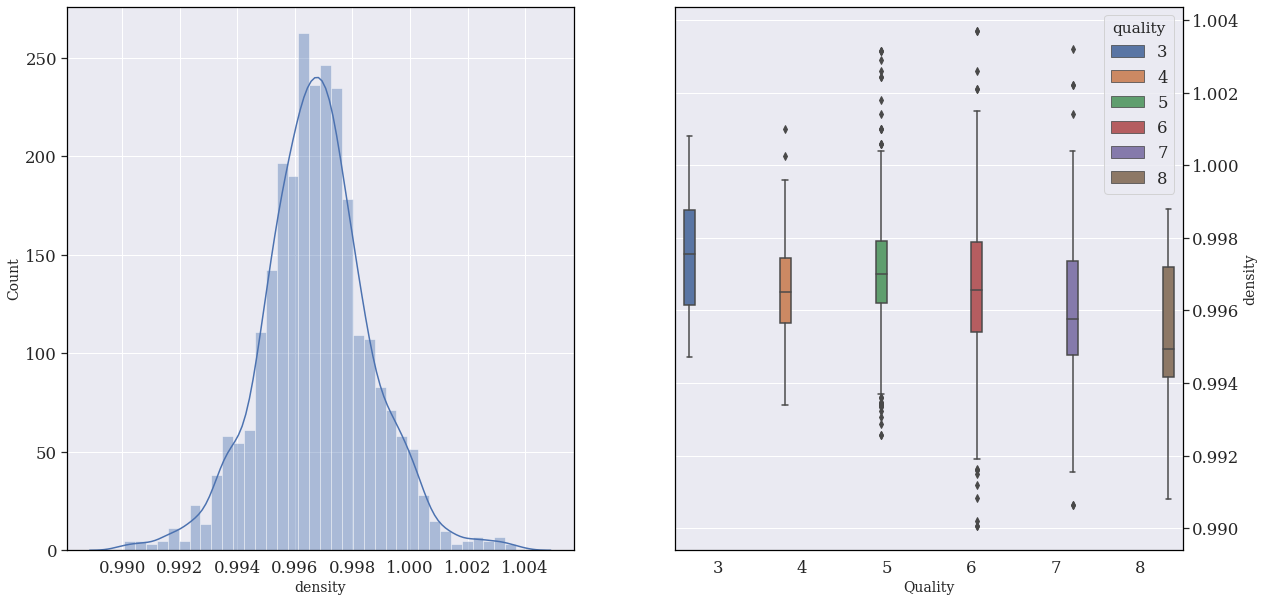

In [76]:
#Density
f, axes = plt.subplots(1,2,figsize=(20,10))

sns.distplot(data['density'], ax = axes[0])
axes[0].set_xlabel('density', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'quality', y = 'density', data = data, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('density', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

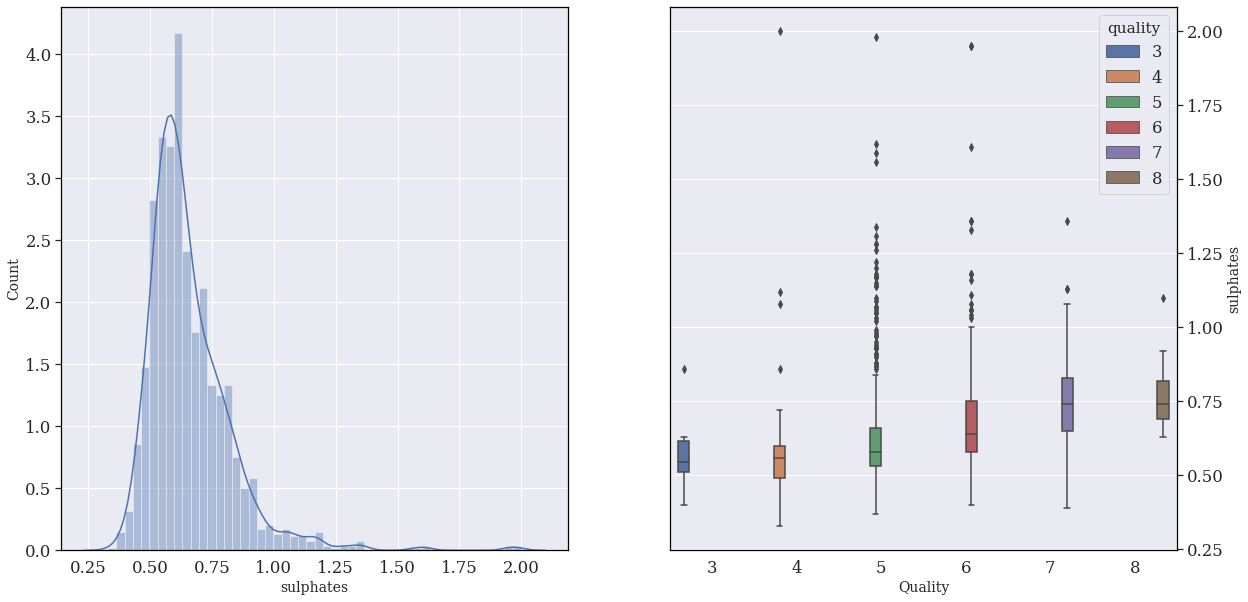

In [77]:
#Sulphates
f, axes = plt.subplots(1,2,figsize=(20,10))

sns.distplot(data['sulphates'], ax = axes[0])
axes[0].set_xlabel('sulphates', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'quality', y = 'sulphates', data = data, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('sulphates', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

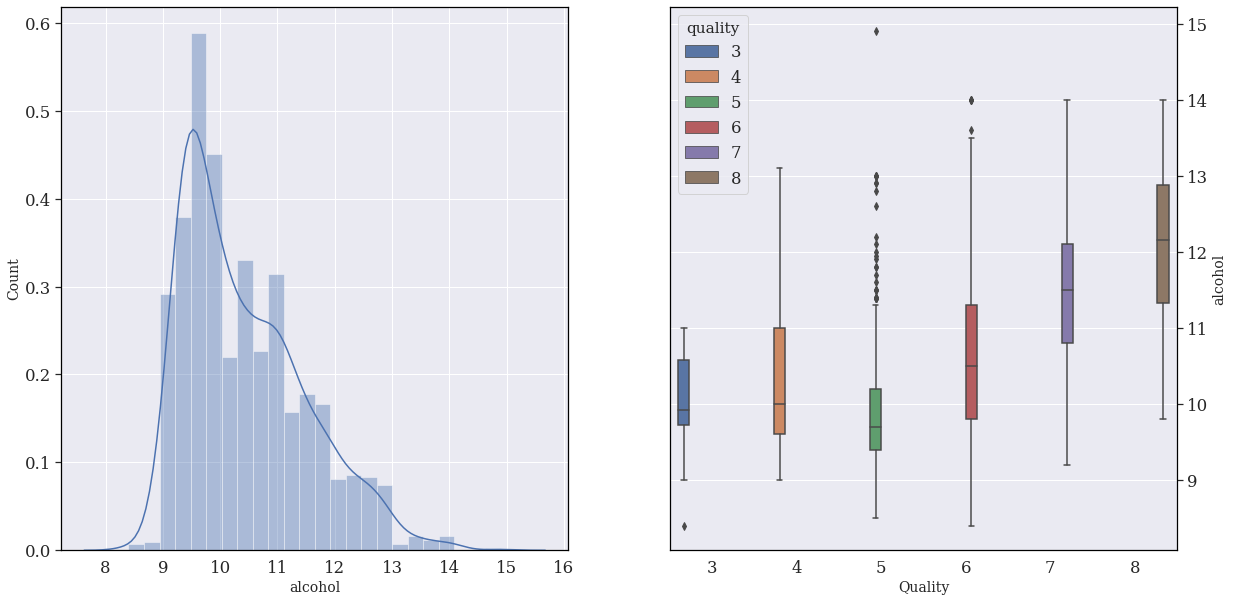

In [78]:
#Alcohol
f, axes = plt.subplots(1,2,figsize=(20,10))

sns.distplot(data['alcohol'], ax = axes[0])
axes[0].set_xlabel('alcohol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'quality', y = 'alcohol', data = data, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('alcohol', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

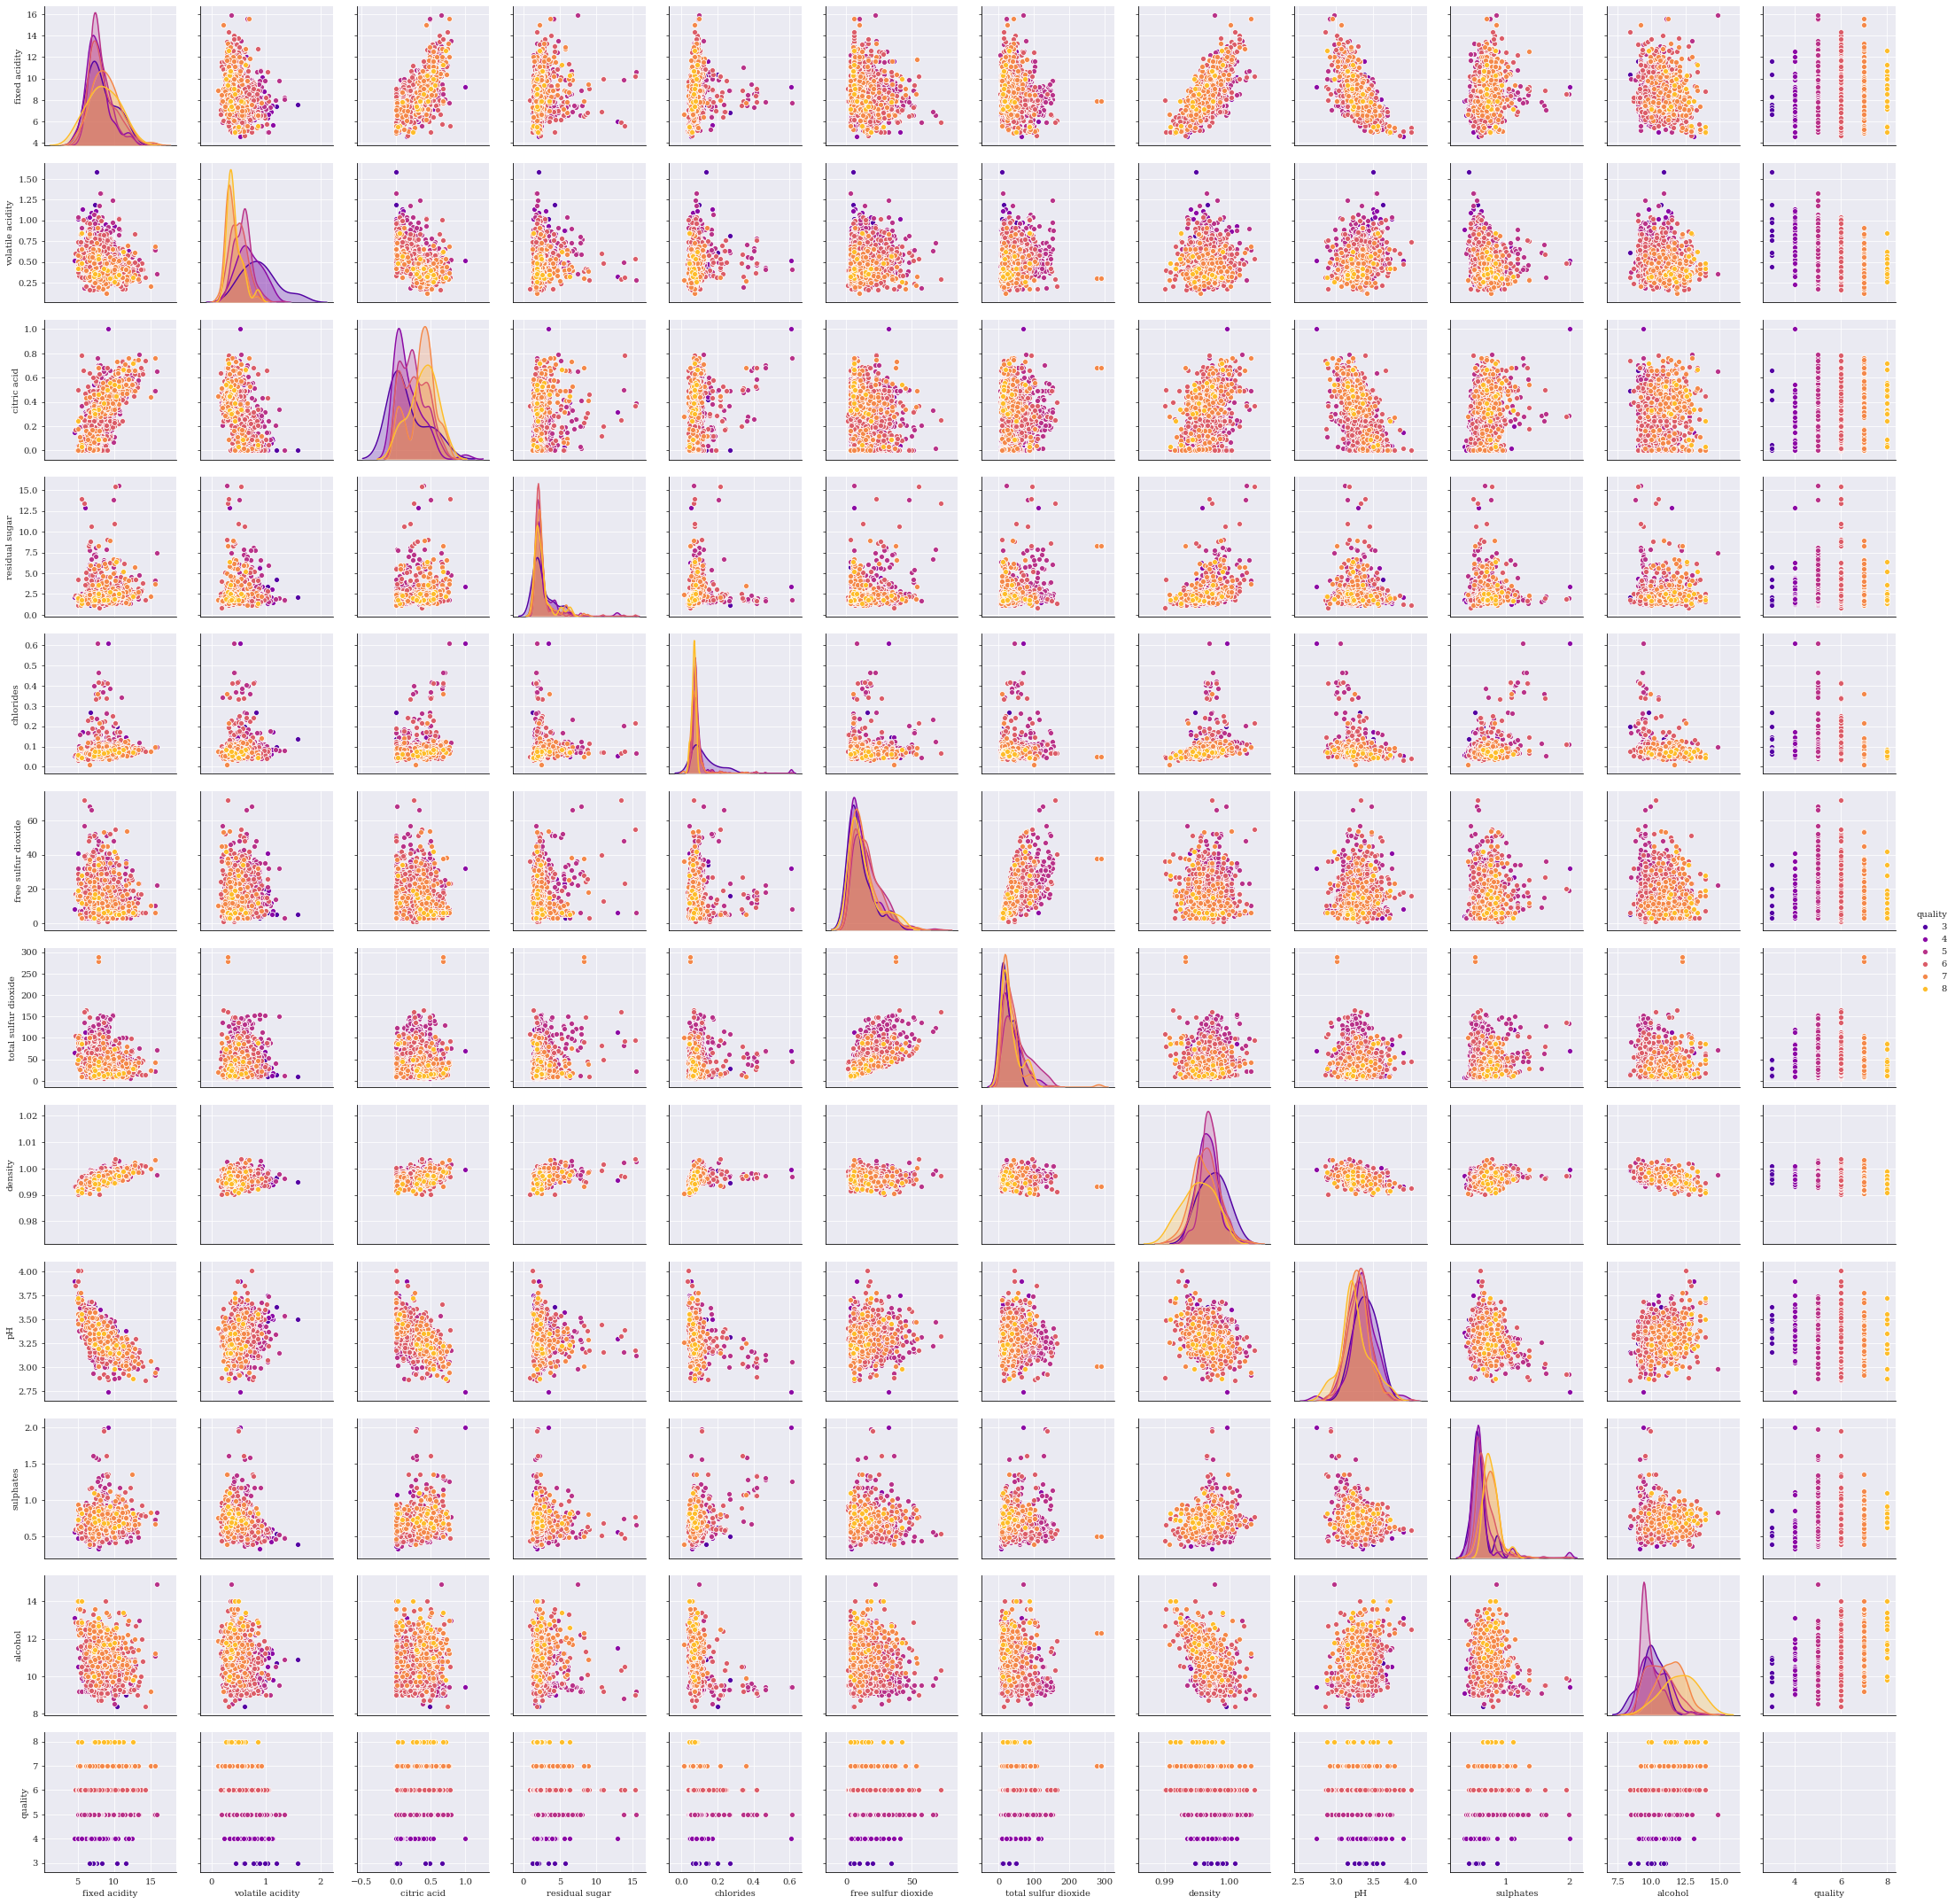

In [35]:
#Scatterplot
sns.pairplot(data,hue="quality", hue_order=[3,4,5,6,7,8], palette="plasma")

In [79]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [80]:
# test and training data
X_data = data.drop(columns = ['quality'])
y_data = data.loc[:,'quality']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 1)



In [81]:
print('Percent of each score in the training data')
print(y_train.value_counts()/y_train.shape[0])

Percent of each score in the training data
5    0.422987
6    0.394058
7    0.132134
4    0.031274
8    0.012510
3    0.007037
Name: quality, dtype: float64


PC       % Variance
1        28.5619 
2        17.4244 
3        14.352  
4        10.9042 
5        8.6443  
6        5.7783  
7        5.3051  
8        3.7272  
9        3.1141  
10       1.6677  
11       0.5208  


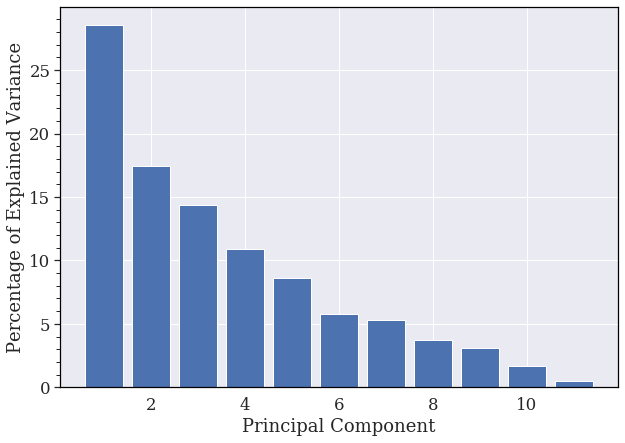

In [82]:
# PCA ANALYSIS
from sklearn.decomposition import PCA
trainScaler = StandardScaler()
trainScaler.fit(X_train)
X_train = trainScaler.transform(X_train)
pca100 = PCA()
pca100_X_train = pca100.fit_transform(X_train)
per_var = pca100.explained_variance_ratio_*100

fmt = '{:<8} {:<8}'
print(fmt.format('PC', '% Variance'))
for i in range(len(per_var)):
    print(fmt.format(i+1, np.round(per_var[i], decimals = 4)))

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})
ax.bar(x=range(1,len(per_var)+1),height=per_var)
ax.set_ylabel("Percentage of Explained Variance")
ax.set_xlabel("Principal Component")
ax.minorticks_on()

In [83]:
#loading_scores
loading_scores_1=pd.Series(pca100.components_[0])
sorted_loading_scores_1=loading_scores_1.abs().sort_values(ascending=False)
top_10_var_PC1=sorted_loading_scores_1[0:10].index.values
print("loading scores for the top 10 of PC1")
print(loading_scores_1[top_10_var_PC1])
loading_scores_2=pd.Series(pca100.components_[1])
sorted_loading_scores_2=loading_scores_2.abs().sort_values(ascending=False)
top_10_var_PC2=sorted_loading_scores_2[0:10].index.values
print("loading scores for the top 10 of PC2")
a=loading_scores_2[top_10_var_PC2]
print(a)

loading scores for the top 10 of PC1
0     0.486880
2     0.460336
8    -0.438818
7     0.395736
9     0.251823
1    -0.229951
4     0.219922
3     0.144961
10   -0.121612
5    -0.035465
dtype: float64
loading scores for the top 10 of PC2
6     0.574514
5     0.521512
10   -0.376981
1     0.271191
3     0.268519
7     0.234375
2    -0.147740
4     0.143661
0    -0.103140
9    -0.044525
dtype: float64


Text(0, 0.5, 'Second Principal Component')

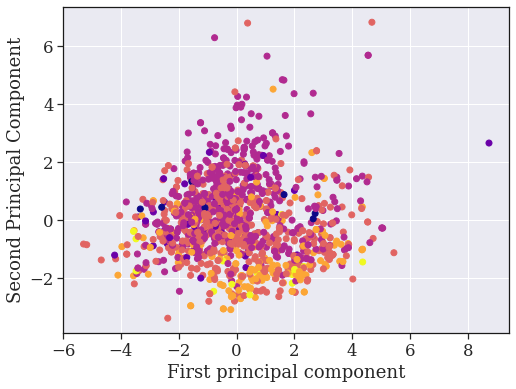

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(pca100_X_train[:,0],pca100_X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')